# Data Visualization with Matplotlib

*Tutorial by Yuan-Sen Ting*

*Astron 1221: Astronomical Data Analysis*

## Introduction

Every astronomical discovery needs visualization. From plotting your first light curve to creating figures for publication, visualization transforms numbers into understanding. Today we'll learn matplotlib, Python's fundamental plotting library that astronomers use daily.

We'll start with the simplest possible plot and gradually build up complexity. By the end, you'll be able to create any visualization you need for your astronomical research.

Let's begin by setting up our notebook environment:

In [1]:
%matplotlib inline

This "magic command" (commands that start with `%`) tells Jupyter notebooks to display plots directly inline with your code, rather than opening them in separate windows. This makes it much easier to work interactively with your data.

While `%matplotlib inline` works in most Jupyter environments, it doesn't always work reliably everywhere. That's why we'll also use `plt.show()` after creating each plot. Think of `plt.show()` as "pushing" the plot to the screen - it explicitly tells matplotlib to render and display the figure. This is good practice because it makes your code more portable and ensures it works in any Python environment, not just Jupyter notebooks. We'll use `plt.show()` throughout this tutorial.

Now let's import the libraries we'll need:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

We import `matplotlib.pyplot` with the nickname `plt` because it's much shorter to type. This is a standard convention that you'll see in almost all astronomy code.

## Your First Plot

Let's start by making the most basic plot possible - just connecting some points with a line. We'll use NumPy arrays from the start, since they're the standard tool for numerical work in Python:

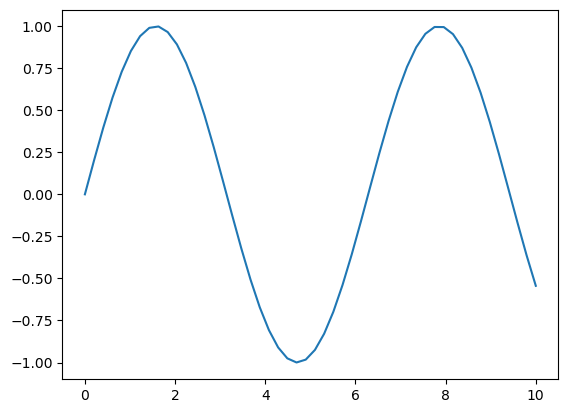

In [3]:
# Create data points using NumPy arrays
x = np.linspace(0, 10, 50)  # 50 evenly spaced points from 0 to 10
y = np.sin(x)

# Plot them
plt.plot(x, y)
plt.show()

That's all it takes! The `plot()` function draws a line connecting your data points. The `linspace(start, stop, number)` function creates evenly spaced points - it's one of the most useful NumPy functions for plotting. With 50 points, the sine wave looks smooth and continuous.

But this plot has a serious problem - anyone looking at it has no idea what the axes represent. Are these measurements? Time series? Arbitrary units? We need labels.

**A plot without labels is essentially useless for science.** Let's fix this:

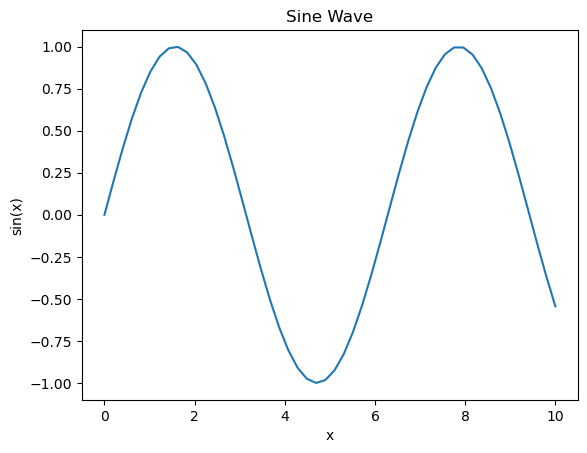

In [4]:
x = np.linspace(0, 10, 50)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('x')  # Label for the horizontal axis
plt.ylabel('sin(x)')  # Label for the vertical axis
plt.title('Sine Wave')  # Title appears at the top
plt.show()

Now anyone can immediately understand what this plot represents. The `xlabel()` function adds text below the horizontal axis, while `ylabel()` adds text beside the vertical axis. **Always include units in parentheses when plotting physical quantities** - for example, 'Time (seconds)' or 'Distance (km)'.

With NumPy arrays, we can perform mathematical operations on entire arrays at once, which is perfect for plotting mathematical functions:

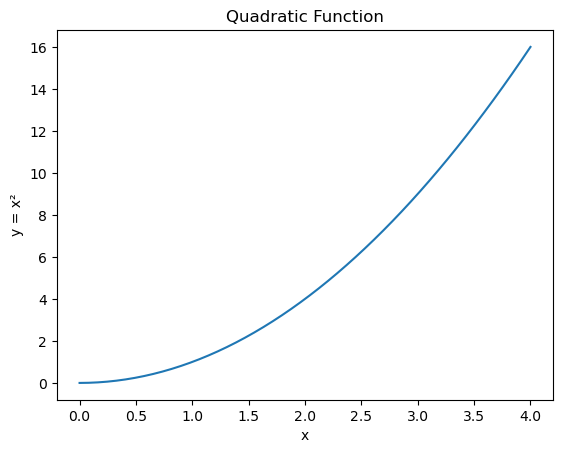

In [5]:
# NumPy can apply operations to all elements at once
x = np.linspace(0, 4, 50)
y = x**2  # Square every element - no loops needed!

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y = x²')
plt.title('Quadratic Function')
plt.show()

### Changing Line Colors

The default blue line isn't always what we want. Sometimes we need different colors to distinguish datasets or match publication requirements:

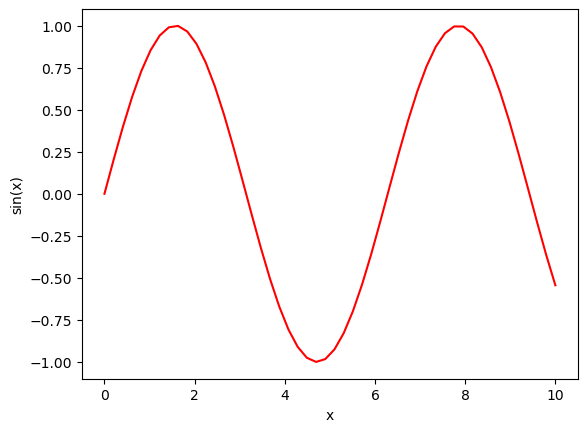

In [6]:
x = np.linspace(0, 10, 50)
y = np.sin(x)

plt.plot(x, y, 'r')  # 'r' means red
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

Common color codes are: `'r'` (red), `'b'` (blue), `'g'` (green), `'k'` (black), `'m'` (magenta), `'y'` (yellow), `'c'` (cyan).

### Changing Line Styles

Sometimes we need dashed or dotted lines to distinguish different models or datasets:

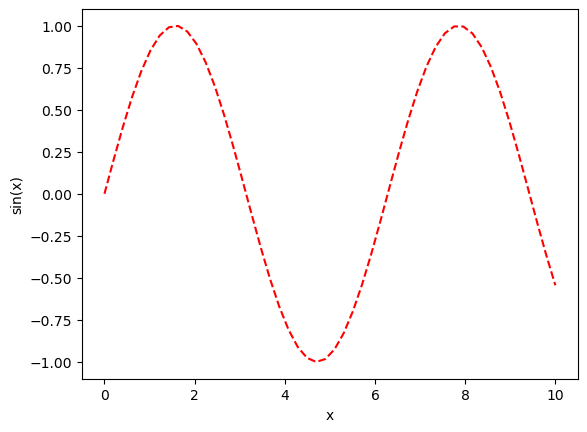

In [7]:
plt.plot(x, y, 'r--')  # Red and dashed
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

The format string `'r--'` combines color and style. The first character sets the color, and the following characters set the line style:
- `'-'` creates a solid line
- `'--'` creates a dashed line
- `':'` creates a dotted line
- `'-.'` creates a dash-dot line

### Being More Explicit with Keywords

Instead of cryptic format strings, we can spell things out clearly using keyword arguments:

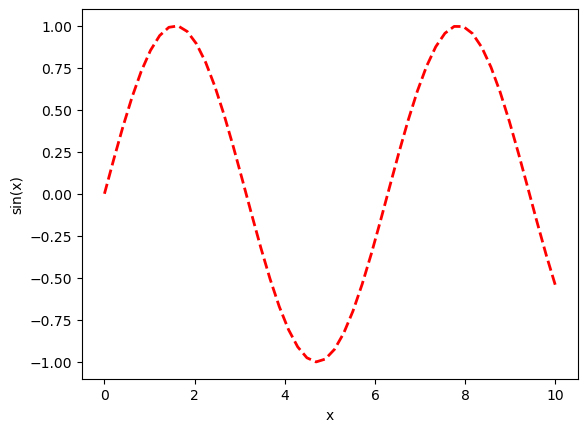

In [8]:
plt.plot(x, y, color='red', linestyle='--', linewidth=2)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

This is much clearer to read, especially for someone new to your code. The `linewidth` parameter controls the thickness of the line in points (1/72 of an inch).

### Plotting Multiple Lines

Often in astronomy we need to compare multiple datasets or models on the same plot:

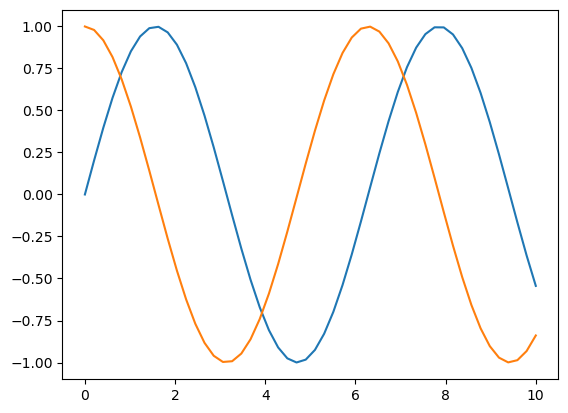

In [9]:
x = np.linspace(0, 10, 50)

plt.plot(x, np.sin(x))  # First line
plt.plot(x, np.cos(x))  # Second line
plt.show()

But which line is which? We need to add labels and a legend:

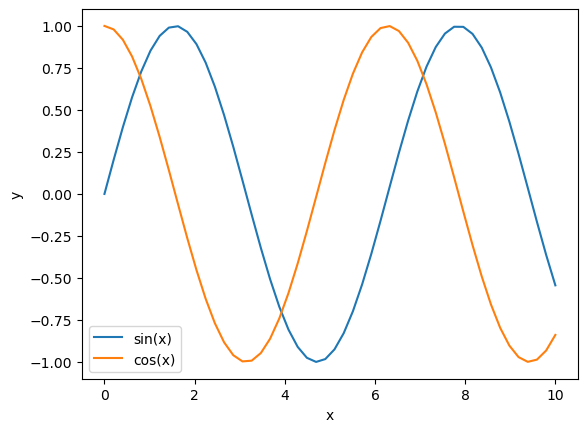

In [10]:
plt.plot(x, np.sin(x), label='sin(x)')  # Add a label
plt.plot(x, np.cos(x), label='cos(x)')  # Add another label
plt.xlabel('x')
plt.ylabel('y')
plt.legend()  # Display the labels in a box
plt.show()

The `legend()` function creates a box showing what each line represents. Without calling `legend()`, the labels won't appear even though we specified them.

### Adding a Grid for Easier Reading

Grid lines help readers estimate values from your plot more accurately:

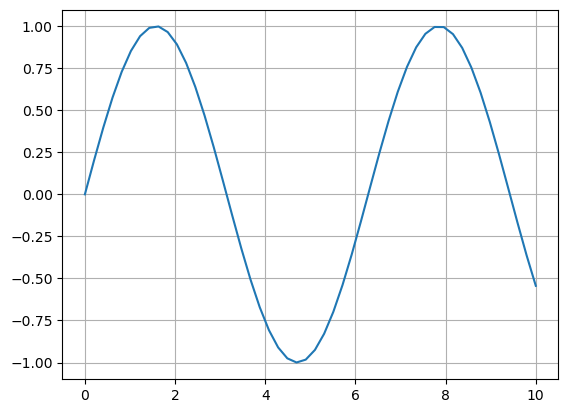

In [11]:
x = np.linspace(0, 10, 50)
plt.plot(x, np.sin(x))
plt.grid(True)  # Add grid lines at the tick marks
plt.show()

If the grid is too prominent and distracts from the data, make it more subtle:

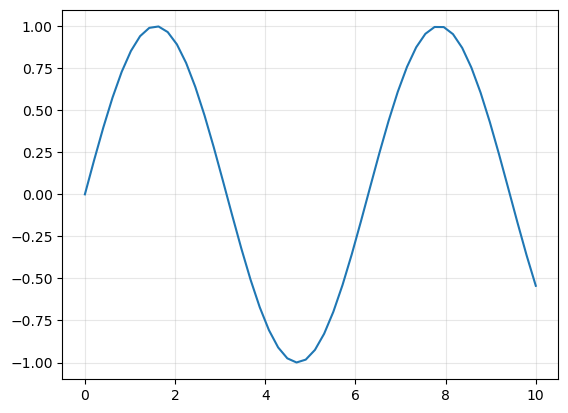

In [12]:
plt.plot(x, np.sin(x))
plt.grid(True, alpha=0.3)  # alpha controls transparency (0=invisible, 1=solid)
plt.show()

The `alpha` parameter works throughout matplotlib to control transparency.

## Essential Plot Types for Astronomy

### Scatter Plots

When we have individual measurements rather than a continuous function, we use scatter plots. This is common in astronomy where we observe discrete objects:

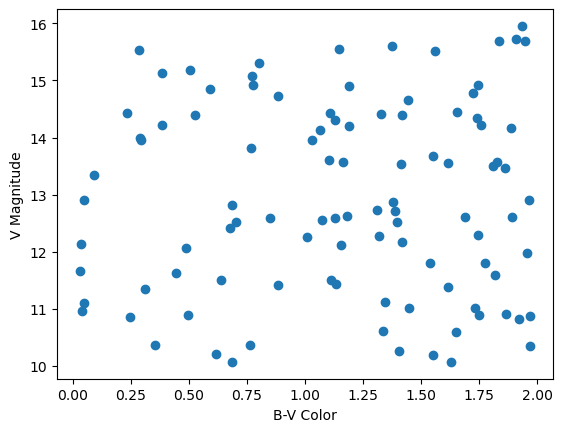

In [13]:
# Simulate 100 stars with random properties
n_stars = 100
color = np.random.uniform(0, 2, n_stars)      # Random colors between 0 and 2
magnitude = np.random.uniform(10, 16, n_stars)  # Random magnitudes between 10 and 16

plt.scatter(color, magnitude)
plt.xlabel('B-V Color')
plt.ylabel('V Magnitude')
plt.show()

The `scatter()` function plots points without connecting them with lines. This is fundamentally different from `plot()` which draws lines between points.

### Flipping the Y-Axis

In astronomy, brighter objects have smaller magnitude values (magnitude 1 is brighter than magnitude 5). This is counterintuitive, so we need to flip the y-axis to match the convention:

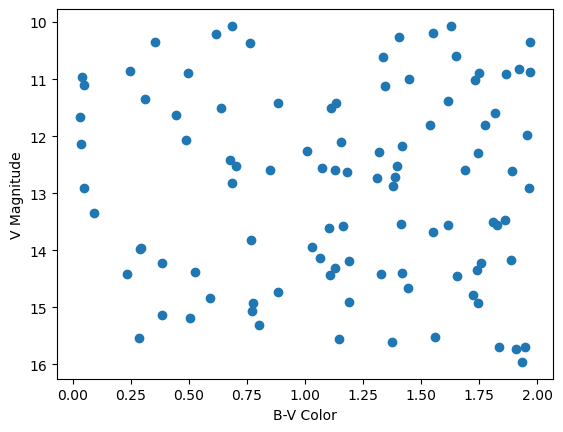

In [14]:
plt.scatter(color, magnitude)
plt.xlabel('B-V Color')
plt.ylabel('V Magnitude')
plt.gca().invert_yaxis()  # Flip the y-axis!
plt.show()

The `gca()` function means "get current axes" - it returns the current plotting area as an object. Then `invert_yaxis()` flips the y-axis direction. This is essential for any magnitude plot in astronomy!

### Customizing Point Appearance

You can control every aspect of how your data points look:

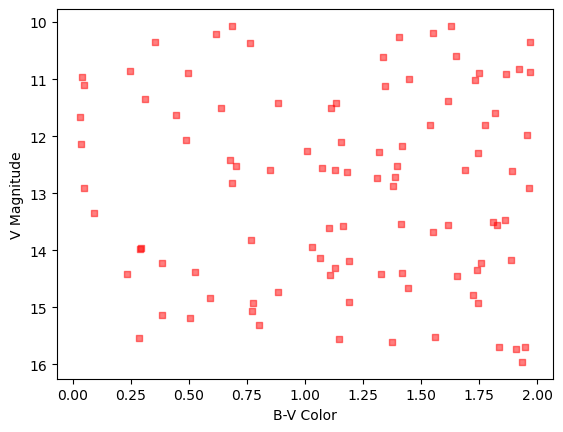

In [15]:
plt.scatter(color, magnitude, 
            s=20,       # Size of points in points squared
            c='red',    # Color (can also be an array for color-mapping)
            marker='s', # Shape: 'o'=circle, 's'=square, '^'=triangle
            alpha=0.5)  # Transparency
plt.xlabel('B-V Color')
plt.ylabel('V Magnitude')
plt.gca().invert_yaxis()
plt.show()

Different markers help distinguish different types of objects (stars vs galaxies, for example).

### Using Transparency to Reveal Density

When plotting thousands of points, they overlap and create solid blobs. Transparency helps reveal the underlying density structure:

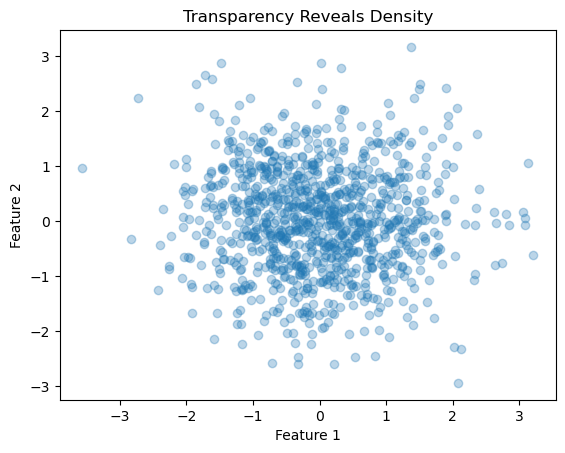

In [16]:
# Generate many overlapping points
n_stars = 1000
x = np.random.normal(0, 1, n_stars)  # Normal distribution, mean=0, std=1
y = np.random.normal(0, 1, n_stars)

plt.scatter(x, y, alpha=0.3)  # alpha=0.3 means 30% opacity
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Transparency Reveals Density')
plt.show()

Without the `alpha` parameter, overlapping points would create an opaque blob. With transparency, darker regions show where more points overlap, revealing the density structure.

### Histograms

Histograms show how data is distributed, answering questions like "How many stars have magnitude 15?" Let's look at the magnitude distribution in a star cluster:

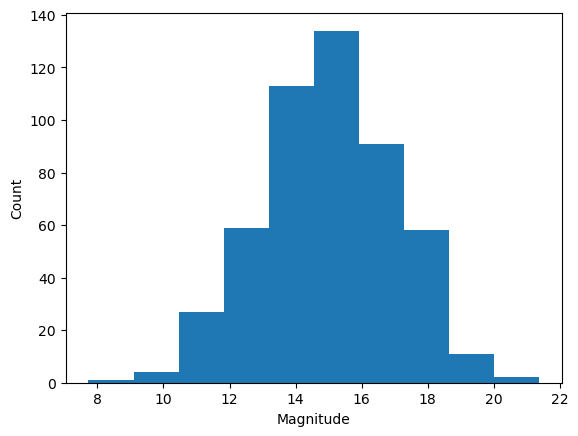

In [17]:
# Simulate cluster magnitudes - normal distribution around magnitude 15
magnitudes = np.random.normal(15, 2, 500)  # 500 stars, mean=15, std=2

plt.hist(magnitudes)
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()

The `hist()` function automatically divides your data into bins and counts how many values fall in each bin, displaying the result as bars.

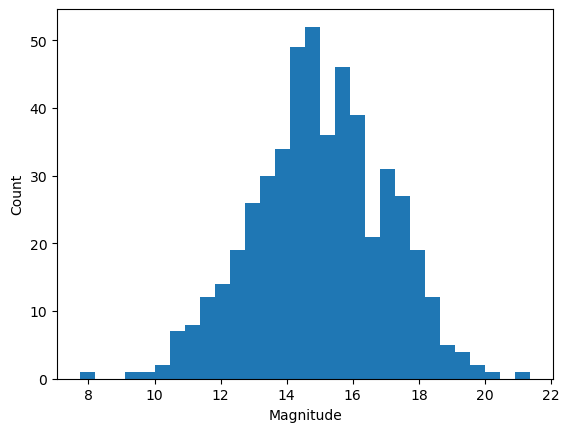

In [18]:
plt.hist(magnitudes, bins=30)  # Use 30 bins instead of the default 10
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()

More bins show finer structure, but too many bins can make the histogram noisy. Choose a number that reveals the important features without over-fragmenting the data.

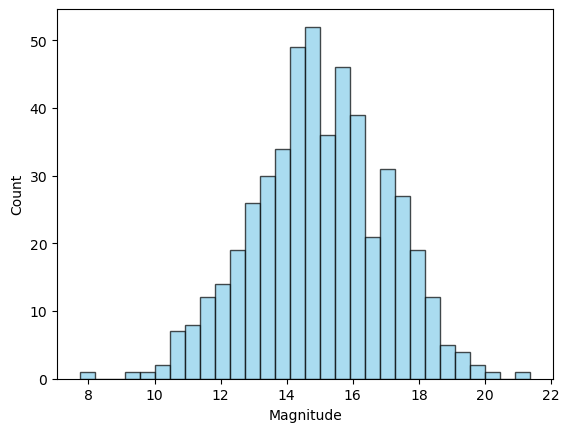

In [19]:
plt.hist(magnitudes, 
         bins=30,
         color='skyblue',     # Fill color
         edgecolor='black',   # Black edges make bars distinct
         alpha=0.7)           # Slight transparency
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()

The black edges help distinguish individual bars, especially important when presenting in black and white.

### Error Bars

Real astronomical measurements always have uncertainties. It's crucial to show these in your plots:

In [20]:
# Photometry measurements over several nights
time = np.array([1, 2, 3, 4, 5])
flux = np.array([10.2, 10.5, 9.8, 10.1, 10.3])
flux_error = np.array([0.2, 0.15, 0.3, 0.2, 0.25])

Plot the data with error bars:

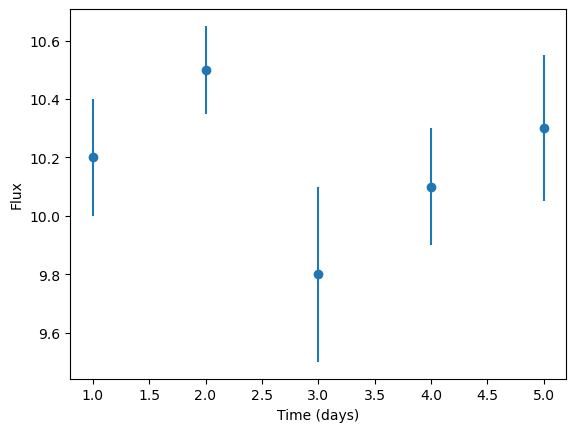

In [21]:
plt.errorbar(time, flux, yerr=flux_error, fmt='o')
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.show()

The `yerr` parameter adds vertical error bars (use `xerr` for horizontal). The `fmt='o'` makes the data points circles - without this, points would be connected by lines (as we have seen in plt.plot above). The parameter is called `fmt` because it stands for "format string" - it controls how the data points and lines are formatted/displayed.

Making error bars more visible:

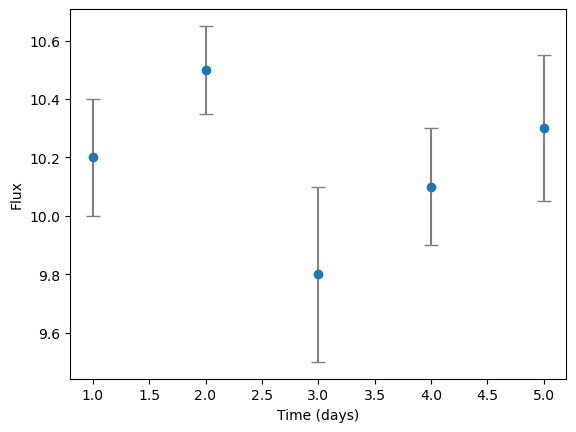

In [22]:
plt.errorbar(time, flux, yerr=flux_error,
             fmt='o',        # Circle markers for data points
             capsize=5,      # Width of error bar caps (the horizontal lines)
             markersize=6,   # Size of the data points
             ecolor='gray')  # Color of error bars
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.show()

The caps (horizontal lines at the ends of error bars) make the extent of uncertainties clearer.

### Error Bars in Both Dimensions

Often we have uncertainties in both measurements. For example, in a color-magnitude diagram, both color and magnitude have errors:

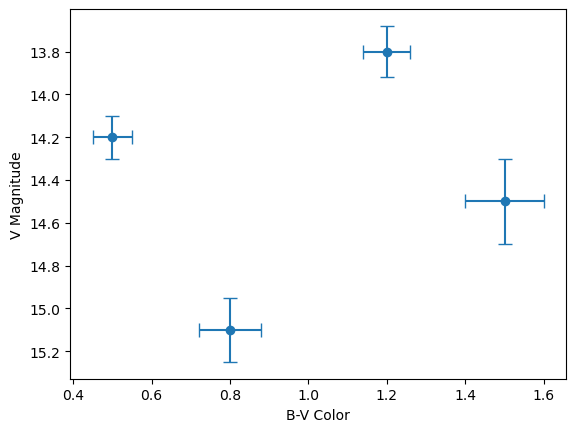

In [23]:
# Color and magnitude with uncertainties
color = np.array([0.5, 0.8, 1.2, 1.5])
magnitude = np.array([14.2, 15.1, 13.8, 14.5])
color_err = np.array([0.05, 0.08, 0.06, 0.1])
mag_err = np.array([0.1, 0.15, 0.12, 0.2])

plt.errorbar(color, magnitude,
             xerr=color_err,  # Horizontal error bars
             yerr=mag_err,     # Vertical error bars
             fmt='o',
             capsize=5)
plt.xlabel('B-V Color')
plt.ylabel('V Magnitude')
plt.gca().invert_yaxis()
plt.show()

Using both `xerr` and `yerr` shows the full uncertainty ellipse for each measurement.

### Shaded Uncertainty Regions

When showing model predictions with uncertainty bands, shaded regions are clearer than many individual error bars:

In [24]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

Now add an uncertainty band:

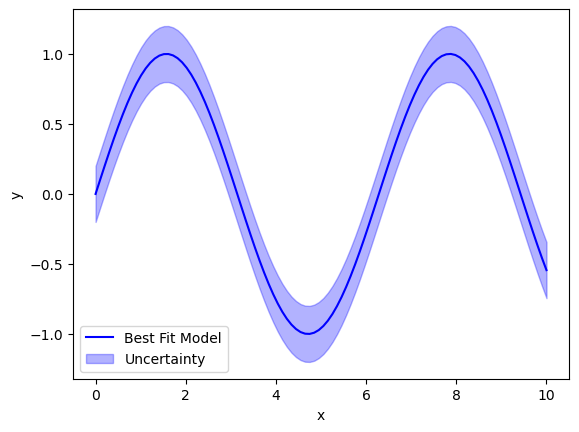

In [25]:
plt.plot(x, y, 'b-', label='Best Fit Model')

# Create shaded region from y-0.2 to y+0.2
plt.fill_between(x, y - 0.2, y + 0.2, 
                 alpha=0.3,     # Semi-transparent
                 color='blue',
                 label='Uncertainty')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The `fill_between()` function creates a shaded area between two curves. The first argument is x-coordinates, second is the lower boundary, third is the upper boundary.

### Logarithmic Scales

Astronomical data often spans many orders of magnitude - from planets to stars to galaxies. Linear scales can't show such ranges effectively:

In [26]:
# Stellar masses from 0.1 to 100 solar masses
masses = np.logspace(-1, 2, 50)  # Creates log-spaced points

The `logspace()` function creates points evenly spaced in logarithmic space. Now let's plot the mass-luminosity relation:

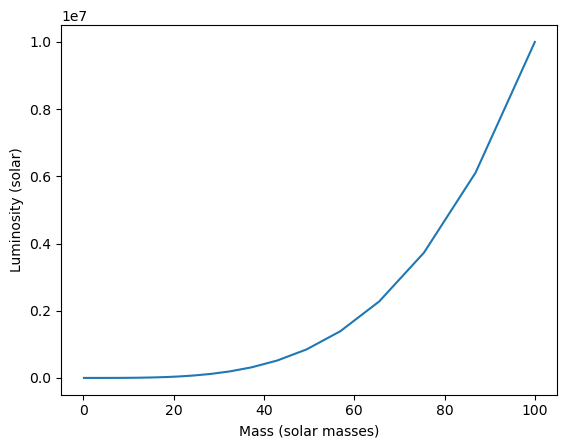

In [27]:
luminosities = masses**3.5  # Approximate L ∝ M^3.5 relation

plt.plot(masses, luminosities)
plt.xlabel('Mass (solar masses)')
plt.ylabel('Luminosity (solar)')
plt.show()

Low-mass stars are invisible on this linear scale! Switch to log scales:

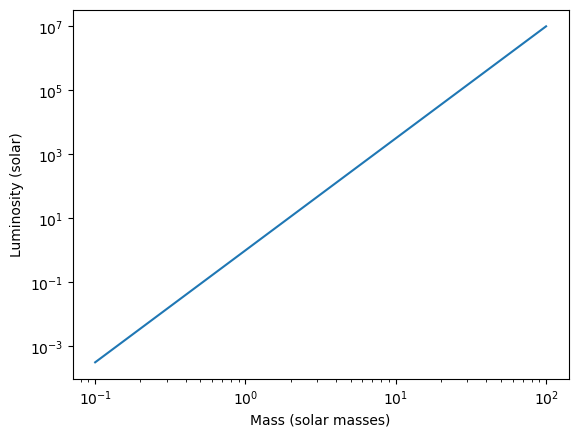

In [28]:
plt.plot(masses, luminosities)
plt.xlabel('Mass (solar masses)')
plt.ylabel('Luminosity (solar)')
plt.xscale('log')  # Make x-axis logarithmic
plt.yscale('log')  # Make y-axis logarithmic
plt.show()

Now we can see stars across the entire mass range clearly! Log scales are essential when your data spans multiple orders of magnitude.

## Working with Figures and Axes

So far we've used simple commands like `plt.plot()`. This works well for single plots, but for complex figures we need more control. Let's understand matplotlib's structure better.

Remember from our object-oriented programming lectures: Python has two ways to use functionality - you can call functions directly (like `plt.plot()`), or you can create objects and call their methods (like `ax.plot()`). The second approach gives us more control and is essential for complex figures.

### Understanding Figures and Axes

Every matplotlib plot consists of two main components:
- **Figure**: The entire window or page (think of it as your canvas or piece of paper)
- **Axes**: The actual plotting area where your data appears (the box with tick marks and labels)

Let's create these explicitly:

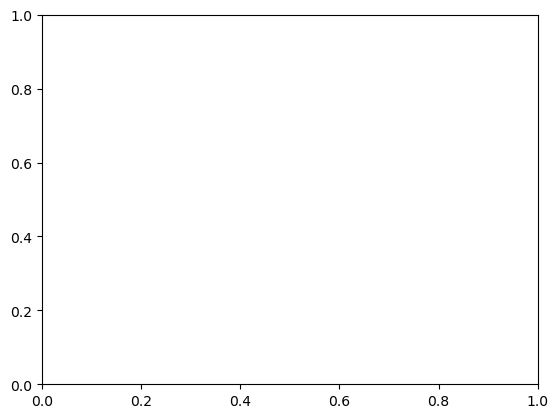

In [29]:
fig, ax = plt.subplots()
plt.show()

This creates a figure (the whole window) and one axes (the plotting area). Now we use the axes object `ax` to plot, rather than `plt`:

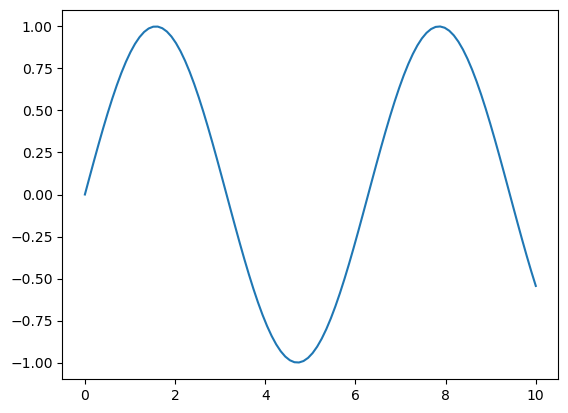

In [30]:
fig, ax = plt.subplots()

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x))  # Note: ax.plot, not plt.plot
plt.show()

When we use the axes object, we call slightly different methods:

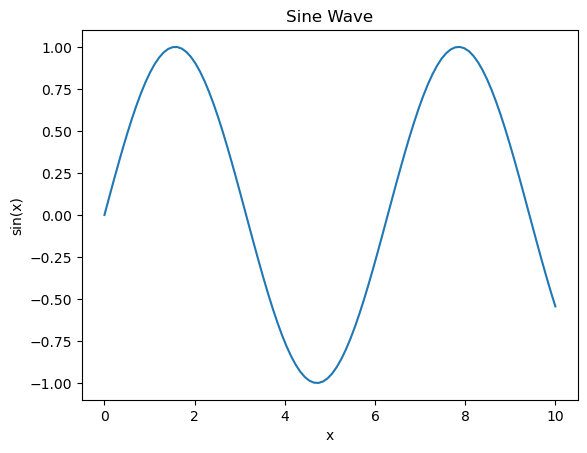

In [31]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x))
ax.set_xlabel('x')      # Note: set_xlabel, not xlabel
ax.set_ylabel('sin(x)')
ax.set_title('Sine Wave')
plt.show()

Notice the method names are slightly different: `set_xlabel` instead of `xlabel`. This is because we're calling methods on the axes object. The axes object bundles the plotting area with all its methods for modifying it - it's an example of object-oriented programming where data and functions are packaged together.

### Creating Multiple Plots Side by Side

The real advantage of this approach becomes clear when we need multiple plots:

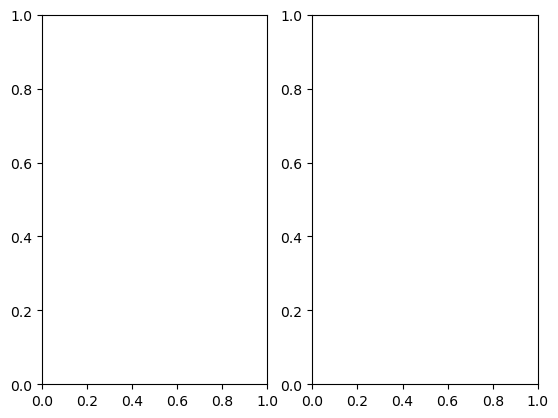

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns
plt.show()

This creates one figure containing two axes (plotting areas). Now we can plot different things in each:

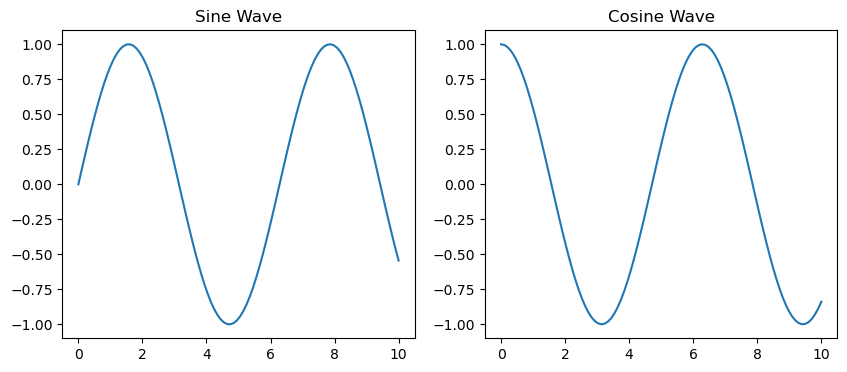

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Left plot
x = np.linspace(0, 10, 100)
ax1.plot(x, np.sin(x))
ax1.set_title('Sine Wave')

# Right plot
ax2.plot(x, np.cos(x))
ax2.set_title('Cosine Wave')

plt.show()

The `figsize=(width, height)` parameter sets the overall figure size in inches.

### Creating a Grid of Plots

For a 2×2 grid of plots, `subplots` returns a 2D array of axes:

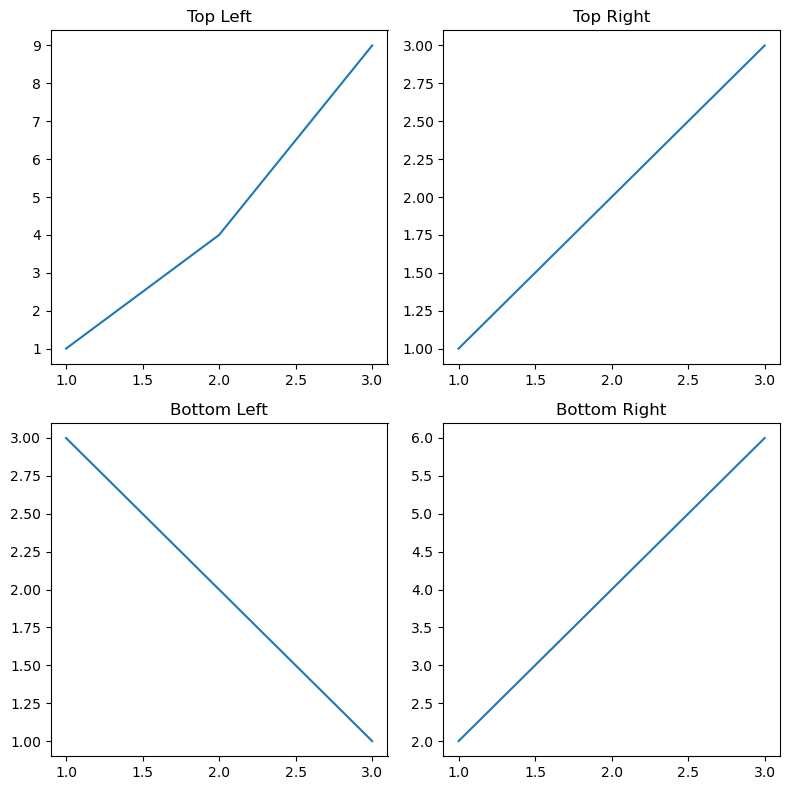

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Top-left plot: row 0, column 0
axes[0, 0].plot([1, 2, 3], [1, 4, 9])
axes[0, 0].set_title('Top Left')

# Top-right plot: row 0, column 1  
axes[0, 1].plot([1, 2, 3], [1, 2, 3])
axes[0, 1].set_title('Top Right')

# Bottom-left plot: row 1, column 0
axes[1, 0].plot([1, 2, 3], [3, 2, 1])
axes[1, 0].set_title('Bottom Left')

# Bottom-right plot: row 1, column 1
axes[1, 1].plot([1, 2, 3], [2, 4, 6])
axes[1, 1].set_title('Bottom Right')

plt.tight_layout()
plt.show()

The `tight_layout()` function automatically adjusts the spacing between subplots to prevent any overlapping text.

### Sharing Axes for Easy Comparison

When comparing time series data (like light curves from different stars), it's helpful to link the axes so they zoom together:

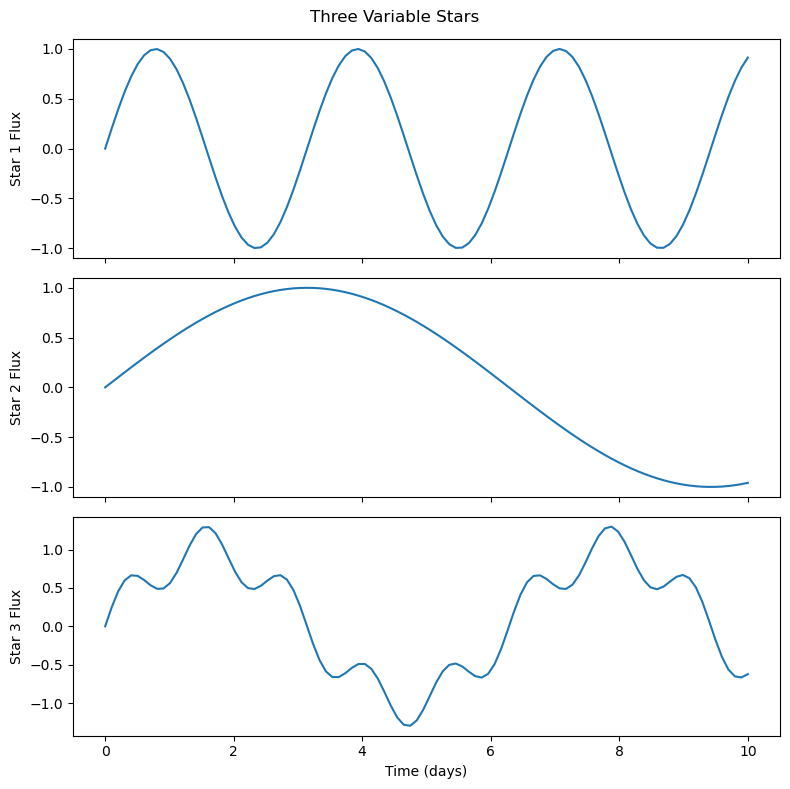

In [35]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 8))

time = np.linspace(0, 10, 100)

# Top plot - fast variable
axes[0].plot(time, np.sin(2*time))
axes[0].set_ylabel('Star 1 Flux')

# Middle plot - slow variable
axes[1].plot(time, np.sin(0.5*time))
axes[1].set_ylabel('Star 2 Flux')

# Bottom plot - irregular variable
axes[2].plot(time, np.sin(time) + 0.3*np.sin(5*time))
axes[2].set_ylabel('Star 3 Flux')
axes[2].set_xlabel('Time (days)')  # Only label the bottom axis

plt.suptitle('Three Variable Stars')  # Overall title for all subplots
plt.tight_layout()
plt.show()

With `sharex=True`, all x-axes are linked together. When you zoom or pan one plot, all three move together.

### Two Different Y-Axes

Sometimes you need to plot quantities with different units on the same plot. For example, temperature and pressure over time:

In [36]:
fig, ax1 = plt.subplots()

# First y-axis (left side) - temperature
time = np.linspace(0, 10, 100)
temperature = 20 + 5*np.sin(time)

ax1.plot(time, temperature, 'r-')
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Temperature (°C)', color='r')
ax1.tick_params(axis='y', labelcolor='r')  # Make tick labels red to match line

Now add a second y-axis on the right:

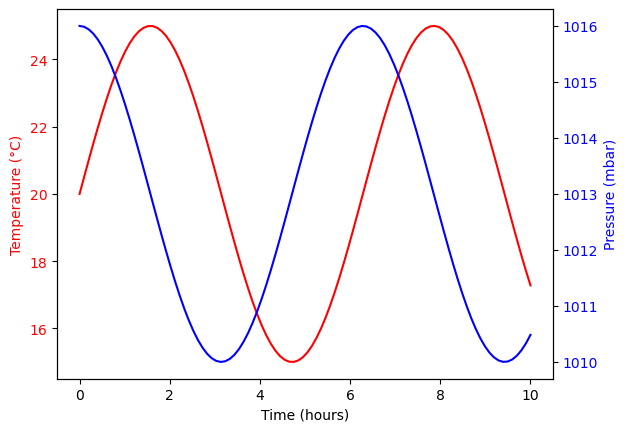

In [37]:
ax2 = ax1.twinx()  # Create a twin axis sharing the same x-axis

# Second y-axis (right side) - pressure
pressure = 1013 + 3*np.cos(time)
ax2.plot(time, pressure, 'b-')
ax2.set_ylabel('Pressure (mbar)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.show()

The `twinx()` method creates a second y-axis that shares the same x-axis. This is useful when plotting related quantities with different units or scales.

## Inset Plots

Sometimes you need to show both the full view and a zoomed detail. Let's create a variable star light curve with an inset showing a single pulsation:

In [38]:
# Create main plot
fig, ax = plt.subplots(figsize=(10, 6))

# Generate pulsating star data
time = np.linspace(0, 30, 1000)
period = 2.5
flux = 1.0 + 0.2*np.sin(2*np.pi*time/period)
flux += np.random.normal(0, 0.01, len(time))  # Add noise

# Main plot
ax.scatter(time, flux, s=1, alpha=0.5)
ax.set_xlabel('Time (days)')
ax.set_ylabel('Normalized Flux')
ax.set_title('Pulsating Variable Star')

Text(0.5, 1.0, 'Pulsating Variable Star')

Now add an inset to zoom in on one pulsation:

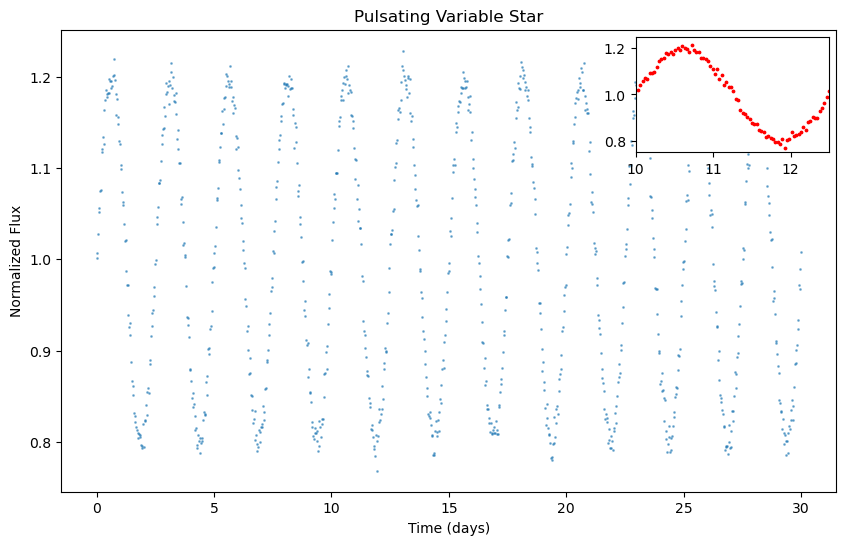

In [39]:
# Create inset axes - position and size as fractions of main axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axins = inset_axes(ax, width="25%", height="25%", loc='upper right')

# Plot zoomed region - one complete pulsation
zoom_mask = (time > 10) & (time < 12.5)
axins.scatter(time[zoom_mask], flux[zoom_mask], s=3, color='red')
axins.set_xlim(10, 12.5)
axins.set_ylim(0.75, 1.25)

plt.show()

The inset clearly shows the shape of a single pulsation cycle while the main plot shows the long-term behavior.

## Working with 2D Data and Images

### Displaying 2D Arrays as Images

In astronomy, we often work with 2D data - CCD images, spectrograms, or any data that varies in two dimensions. Let's start with a simple example:

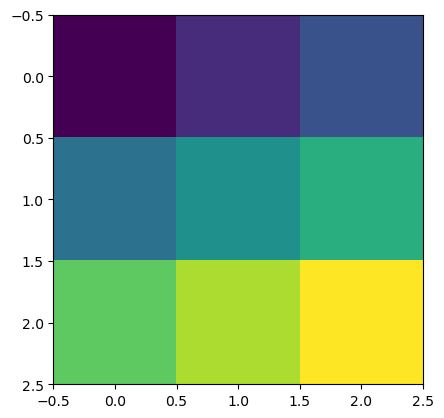

In [40]:
# Create a simple 3x3 array
data = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])

plt.imshow(data)
plt.show()

The `imshow()` function converts each number in the array to a color. By default, low values are purple/blue and high values are yellow. Let's add a colorbar to see this mapping:

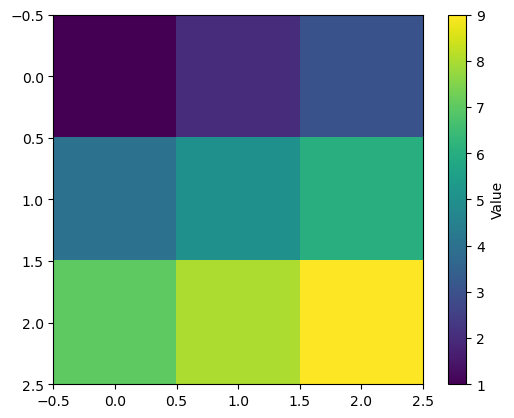

In [41]:
plt.imshow(data)
plt.colorbar(label='Value')  # Shows the mapping and adds a label
plt.show()

The colorbar shows which colors correspond to which values. Always label your colorbar to indicate what the values represent!

### Creating a More Realistic Example

Let's create something that resembles astronomical data - a 2D Gaussian that could represent the brightness profile of a star or galaxy:

In [42]:
# Create coordinate grids
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)

The `meshgrid()` function creates 2D coordinate arrays from 1D arrays. Think of it as creating a grid where every point has an (X, Y) coordinate.

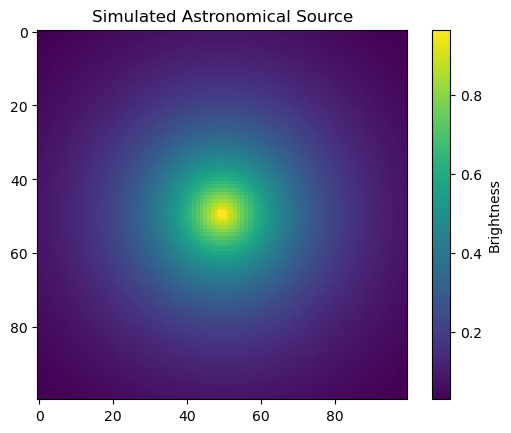

In [43]:
# Calculate distance from center
radius = np.sqrt(X**2 + Y**2)

# Create exponential brightness profile
brightness = np.exp(-radius/8)

plt.imshow(brightness)
plt.colorbar(label='Brightness')
plt.title('Simulated Astronomical Source')
plt.show()

This creates a circular pattern that's brightest at the center and fades exponentially - similar to how we might observe a distant galaxy or star.

By default, matplotlib puts the origin (0,0) at the top-left corner, like computer graphics. But astronomical FITS images put (0,0) at the bottom-left:

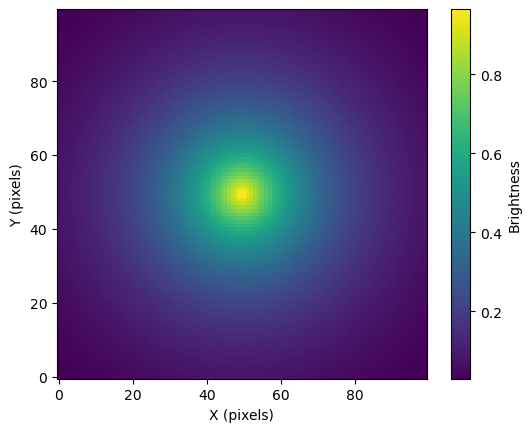

In [44]:
plt.imshow(brightness, origin='lower')  # Put origin at bottom-left
plt.colorbar(label='Brightness')
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.show()

Always use `origin='lower'` for astronomical images, or your data will appear flipped vertically!

### Choosing Appropriate Colormaps

Different colormaps serve different purposes. Let's compare a few:

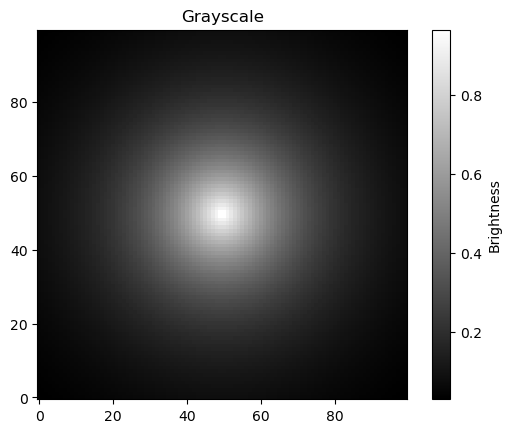

In [45]:
plt.imshow(brightness, origin='lower', cmap='gray')
plt.colorbar(label='Brightness')
plt.title('Grayscale')
plt.show()

Grayscale is ideal for printed publications. For presentations or digital viewing, try:

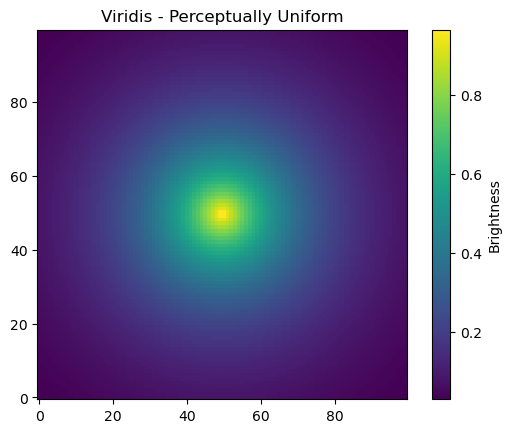

In [46]:
plt.imshow(brightness, origin='lower', cmap='viridis')
plt.colorbar(label='Brightness')
plt.title('Viridis - Perceptually Uniform')
plt.show()

Viridis is "perceptually uniform" - equal steps in data value appear as equal steps in perceived color. Avoid the 'jet' colormap - such rainbow-like colors might create artificial perception that aren't in your data!

### Adjusting Image Scaling

When your data has a large dynamic range (very bright and very faint features), linear scaling won't show everything. Let's demonstrate with two separate plots:

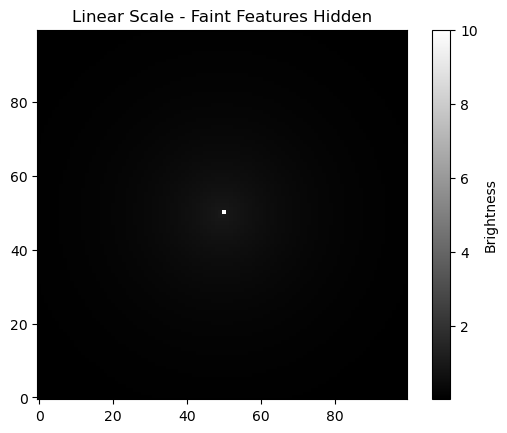

In [47]:
# Add a bright point source to our image
image_with_star = brightness.copy()
image_with_star[50, 50] = 10  # Very bright pixel at position (50,50)

# Linear scale - can't see the faint extended emission
plt.imshow(image_with_star, origin='lower', cmap='gray')
plt.colorbar(label='Brightness')
plt.title('Linear Scale - Faint Features Hidden')
plt.show()

Now try logarithmic scaling:

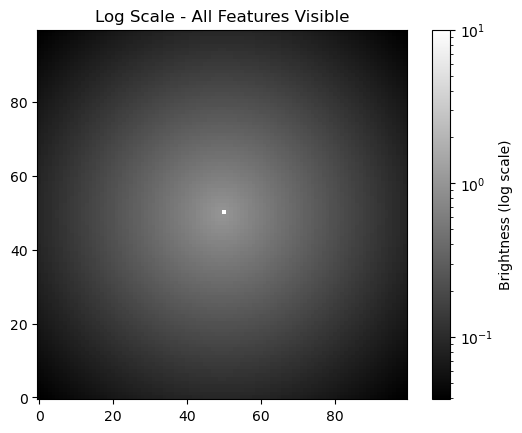

In [48]:
from matplotlib.colors import LogNorm

# Logarithmic scale - reveals faint features
plt.imshow(image_with_star + 0.01,  # Add small value to avoid log(0)
           origin='lower', 
           cmap='gray',
           norm=LogNorm())
plt.colorbar(label='Brightness (log scale)')
plt.title('Log Scale - All Features Visible')
plt.show()

The `LogNorm()` class changes how values map to colors, using a logarithmic scaling. This is essential for astronomical images that often contain both bright stars and faint nebulosity.

### 2D Histograms for Dense Scatter Data

When you have thousands or millions of points, regular scatter plots just show solid blobs:

In [49]:
# Simulate many data points
n = 5000
x = np.random.normal(0, 1, n)
y = 2*x + np.random.normal(0, 0.5, n)  # Correlated with x plus noise

Let's compare scatter plot versus 2D histogram:

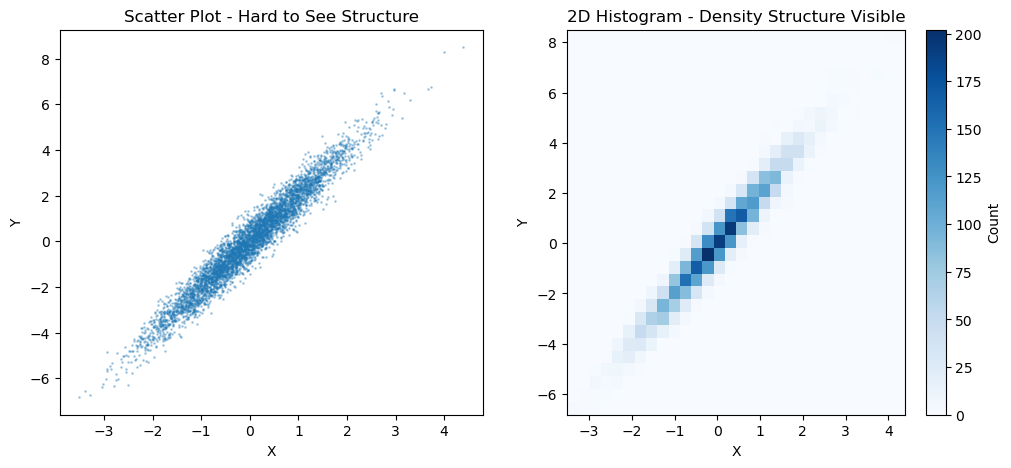

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Regular scatter - just a blob
ax1.scatter(x, y, s=1, alpha=0.3)
ax1.set_title('Scatter Plot - Hard to See Structure')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# 2D histogram - reveals density structure
h = ax2.hist2d(x, y, bins=30, cmap='Blues')
ax2.set_title('2D Histogram - Density Structure Visible')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.colorbar(h[3], ax=ax2, label='Count')

plt.show()

The `hist2d()` function divides the plane into bins and counts points in each bin, showing density rather than individual points.

### Hexagonal Binning

Another useful technique for dense data is hexagonal binning, which can be more visually appealing and efficient:

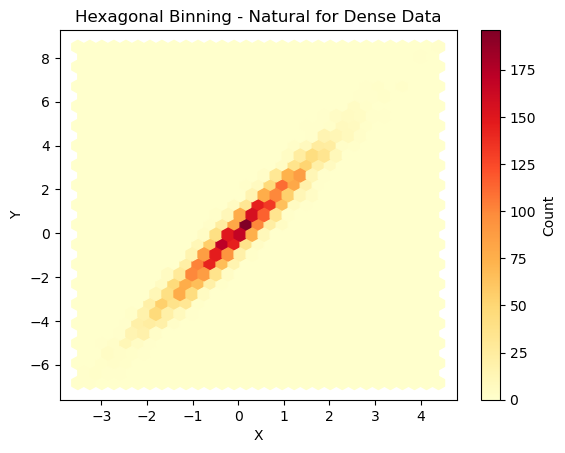

In [51]:
plt.hexbin(x, y, gridsize=30, cmap='YlOrRd')
plt.colorbar(label='Count')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hexagonal Binning - Natural for Dense Data')
plt.show()

Hexagonal bins are often used in astronomy because they provide more uniform neighbor distances than square bins and look more natural.

### Creating Contour Plots

Contour plots are essential for showing confidence regions from parameter fits or density distributions:

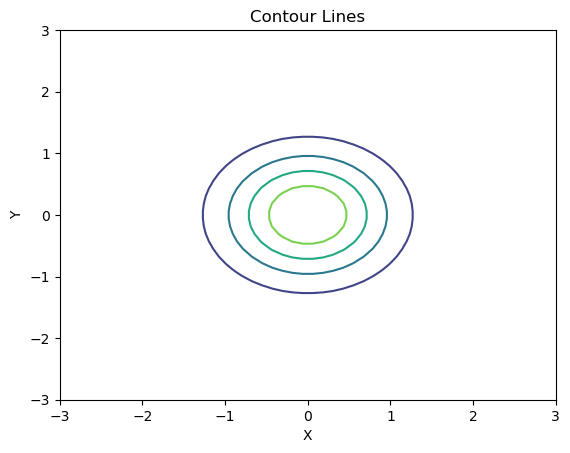

In [52]:
# Create a 2D Gaussian distribution
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))  # 2D Gaussian

plt.contour(X, Y, Z, levels=5)  # Draw 5 contour lines
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Lines')
plt.show()

For filled contours that show regions rather than just lines:

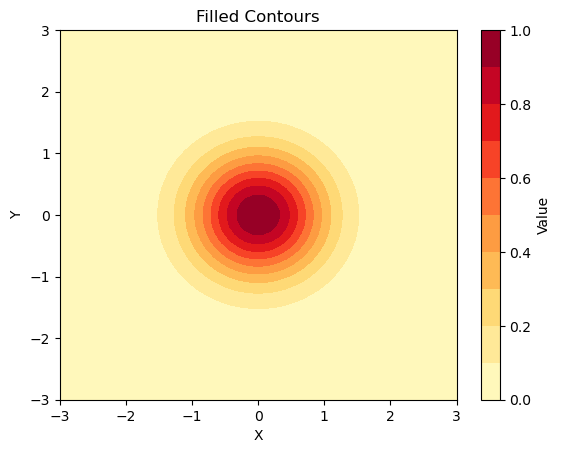

In [53]:
plt.contourf(X, Y, Z, levels=10, cmap='YlOrRd')
plt.colorbar(label='Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Filled Contours')
plt.show()

The `contourf()` function creates filled regions between contour levels, which can be clearer than just lines.

## 3D Plots

Matplotlib can create 3D visualizations for data that varies in three dimensions. This is useful for showing surfaces, 3D scatter plots, or complex mathematical functions.

### Setting Up 3D Plots

To create 3D plots, we need to import a special toolkit and specify that we want a 3D projection:

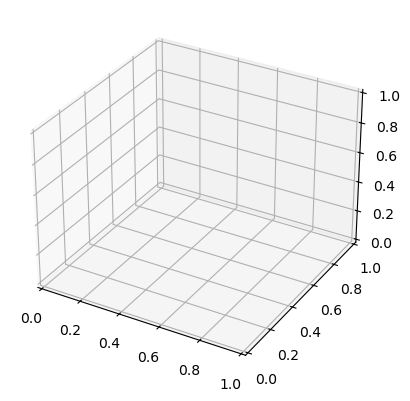

In [54]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.show()

This creates a 3D axes with x, y, and z dimensions that you can rotate interactively.

### 3D Line Plots

Let's start with a simple 3D line - a helix:

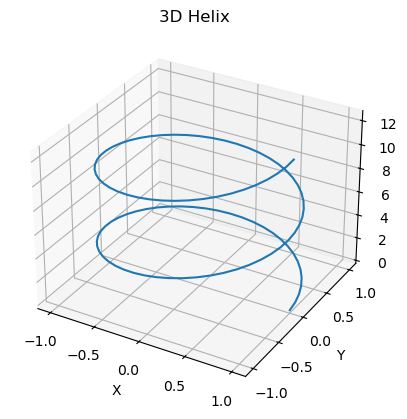

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a helix
t = np.linspace(0, 4*np.pi, 100)
x = np.cos(t)
y = np.sin(t)
z = t

ax.plot(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Helix')
plt.show()

The 3D plot shows how the line spirals through space. You can rotate this interactively in Jupyter notebooks.

### 3D Scatter Plots

3D scatter plots are useful for visualizing three-dimensional distributions:

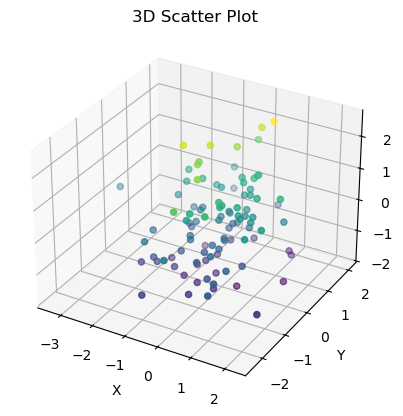

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate random 3D data
n = 100
xs = np.random.normal(0, 1, n)
ys = np.random.normal(0, 1, n)
zs = np.random.normal(0, 1, n)

ax.scatter(xs, ys, zs, c=zs, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')
plt.show()

The `c=zs` parameter colors points by their z-value, adding an extra dimension of information.

### Surface Plots

Surface plots are perfect for visualizing 2D functions or fitted surfaces. Let's create a 3D surface:

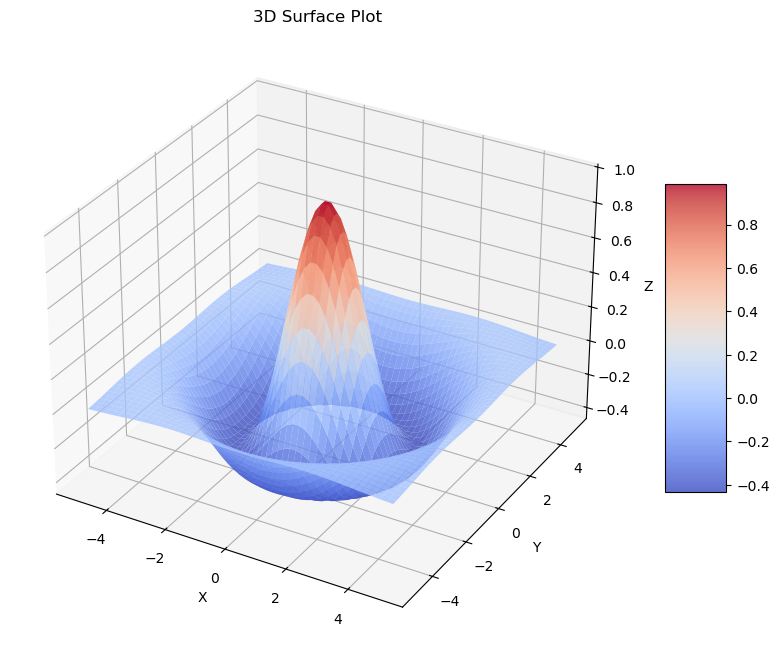

In [57]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create grid
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Create a surface function (like a 2D Gaussian)
Z = np.exp(-(X**2 + Y**2)/10) * np.cos(np.sqrt(X**2 + Y**2))

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')

# Add a colorbar
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

The `plot_surface()` function creates a smooth surface connecting all the grid points.

### Adjusting 3D View Angle

You can set the viewing angle programmatically:

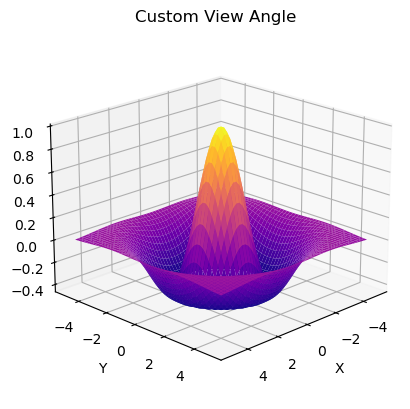

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='plasma')
ax.view_init(elev=20, azim=45)  # Elevation and azimuth angles
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Custom View Angle')
plt.show()

The `view_init()` function sets the elevation (vertical angle) and azimuth (horizontal rotation).

## Sky Projections for Survey Data

Astronomical surveys observe objects across the entire sky. Displaying positions on the celestial sphere requires special projections:

In [59]:
# Generate random star positions across the sky
n_stars = 1000
ra = np.random.uniform(0, 360, n_stars)   # Right Ascension in degrees
dec = np.random.uniform(-90, 90, n_stars)  # Declination in degrees

For all-sky projections, we need to convert to radians and adjust the coordinate system:

In [60]:
ra_rad = np.deg2rad(ra - 180)  # Convert to radians and center at RA=180
dec_rad = np.deg2rad(dec)

Now create an all-sky map using the Mollweide projection:

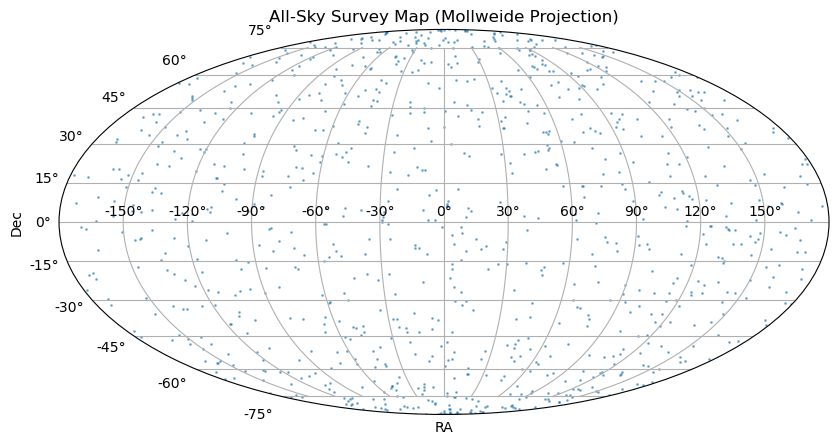

In [61]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='mollweide')

ax.scatter(ra_rad, dec_rad, s=1, alpha=0.5)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.grid(True)
plt.title('All-Sky Survey Map (Mollweide Projection)')
plt.show()

The `projection='mollweide'` parameter creates an oval-shaped map that shows the entire sky. This is standard for displaying survey data.

## Global Settings with rcParams

Matplotlib's appearance is controlled by rcParams (runtime configuration parameters). You can modify these to change default settings for all your plots.

### Viewing Current Settings

You can see all current settings:

In [62]:
import matplotlib as mpl

# View a specific parameter
print(mpl.rcParams['lines.linewidth'])
print(mpl.rcParams['font.size'])

1.5
10.0


### Modifying rcParams

You can change defaults for your entire session:

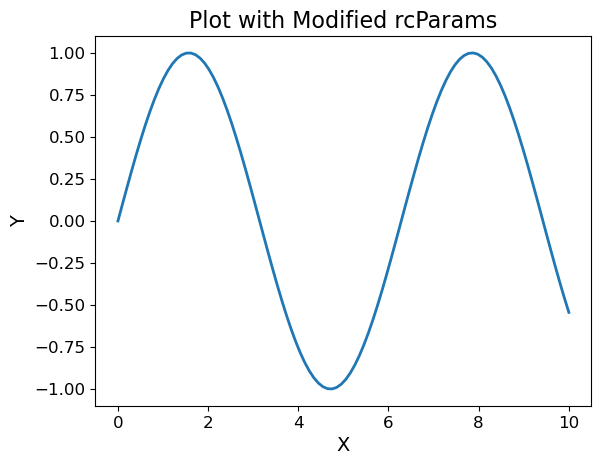

In [63]:
# Change default settings
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.fontsize'] = 11

# Now all plots will use these defaults
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot with Modified rcParams')
plt.show()

### Using RC Context Manager

For temporary changes (that only apply within a specific code block), use the context manager:

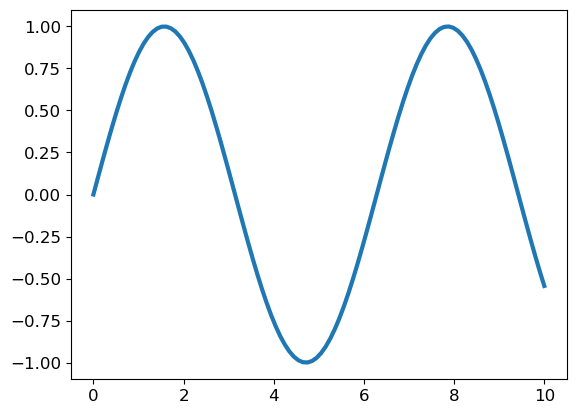

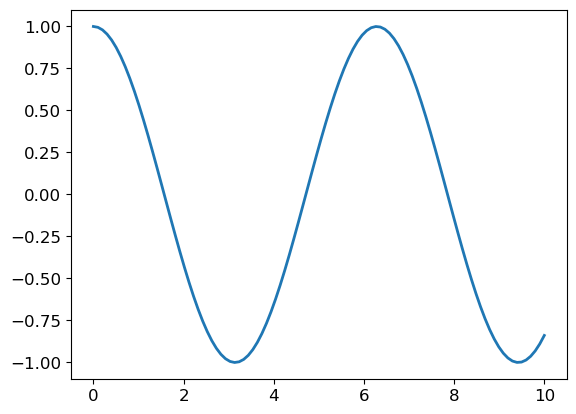

In [64]:
with mpl.rc_context({'lines.linewidth': 3, 'lines.color': 'red'}):
    plt.plot(x, np.sin(x))
    plt.show()

# Outside the context, defaults are restored
plt.plot(x, np.cos(x))
plt.show()

## LaTeX Rendering for Publication-Quality Equations

For professional publications, you often need properly formatted mathematical expressions. Matplotlib can use LaTeX to render text.

You can use LaTeX syntax in any text by wrapping it in dollar signs:

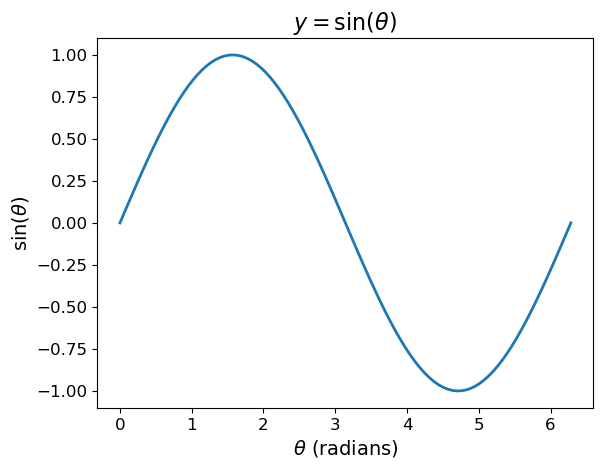

In [65]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel(r'$\theta$ (radians)')  # r'' for raw string
plt.ylabel(r'$\sin(\theta)$')
plt.title(r'$y = \sin(\theta)$')
plt.show()

The `r` before the string makes it a "raw string" - this tells Python to treat backslashes literally instead of as escape characters. In regular strings, \n means newline, \t means tab, etc. But in LaTeX, backslashes are used for commands like \sin, \theta, \alpha. Raw strings prevent Python from interpreting these backslashes, passing them directly to LaTeX.

### More Complex Equations

You can include complex mathematical expressions:

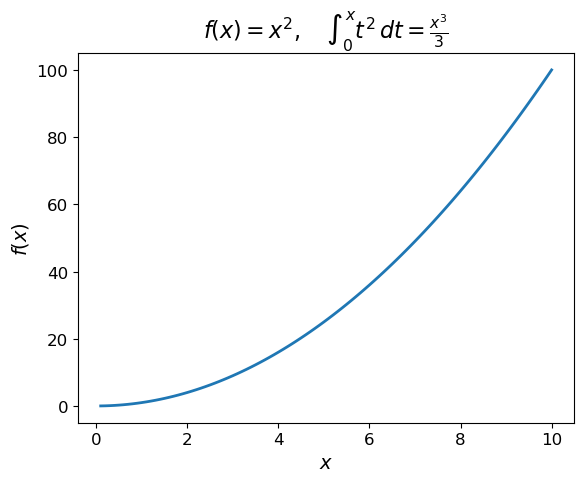

In [66]:
x = np.linspace(0.1, 10, 100)
y = x**2

plt.plot(x, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'$f(x) = x^2, \quad \int_0^x t^2\,dt = \frac{x^3}{3}$')
plt.show()

LaTeX makes it easy to include Greek letters and mathematical symbols:

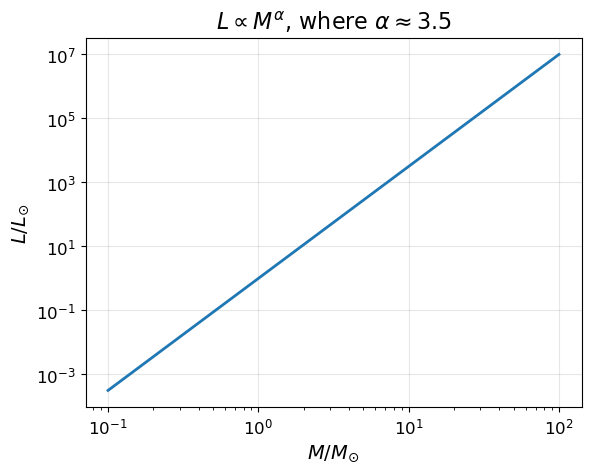

In [67]:
# Mass-luminosity relation
masses = np.logspace(-1, 2, 50)
luminosities = masses**3.5

plt.loglog(masses, luminosities)
plt.xlabel(r'$M/M_{\odot}$')  # Solar mass symbol
plt.ylabel(r'$L/L_{\odot}$')
plt.title(r'$L \propto M^{\alpha}$, where $\alpha \approx 3.5$')
plt.grid(True, alpha=0.3)
plt.show()

## DPI and Rasterization for Complex Figures

When creating figures with thousands of points or complex elements, file size and rendering performance become important. DPI (dots per inch) controls the resolution of raster images:

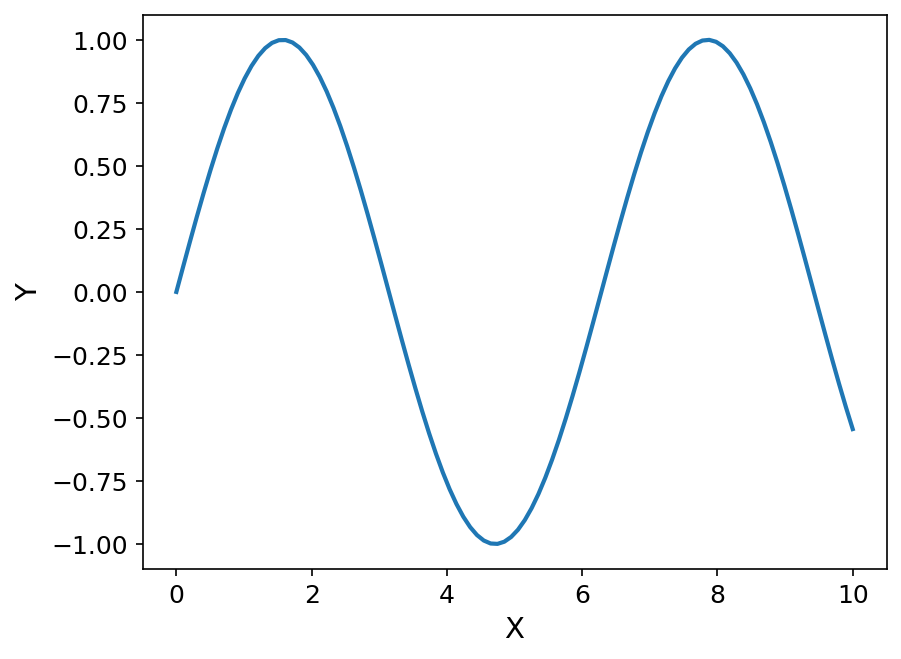

In [68]:
# Create a figure with specific DPI
fig = plt.figure(dpi=150)  # Screen display DPI
ax = fig.add_subplot(111)

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x))
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

Different DPI for display vs saving:

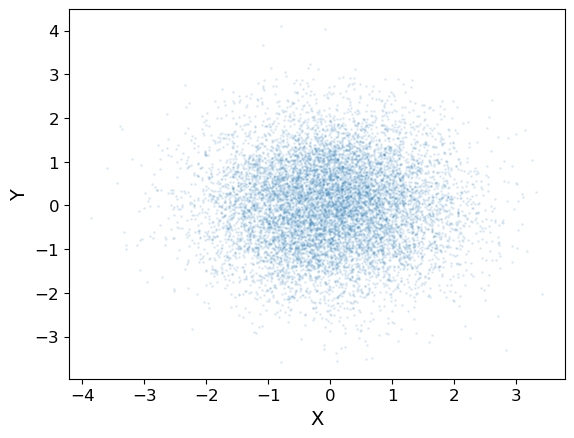

In [69]:
# Display at 100 DPI, save at 300 DPI
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)

# Create dense scatter plot
n = 10000
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)
ax.scatter(x, y, s=1, alpha=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Save at publication quality
plt.savefig('high_res.png', dpi=300)
plt.savefig('web_res.png', dpi=72)  # Web resolution
plt.show()

### Rasterization for Mixed Vector/Raster Figures

When you have plots with many points, pure vector formats (PDF) become huge - and this is a really common mistake that makes publications super silly! You'll end up with that one page in your PDF that takes forever to load and makes everyone's PDF viewer crawl to a halt. 

Rasterization converts specific plot elements from vector format (which stores mathematical descriptions of shapes) to raster format (which stores a grid of pixel values). This lets you keep text and axes as crisp vectors while converting data-heavy elements like scatter plots to raster, dramatically reducing file size and preventing those embarrassing slow-loading publication pages:

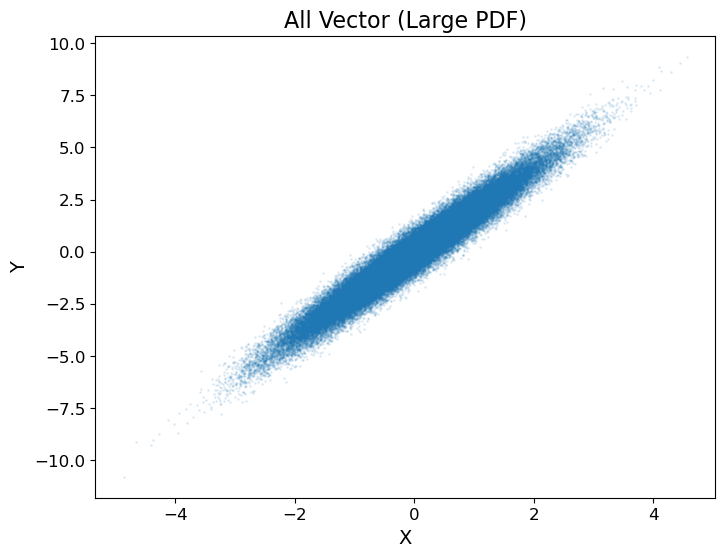

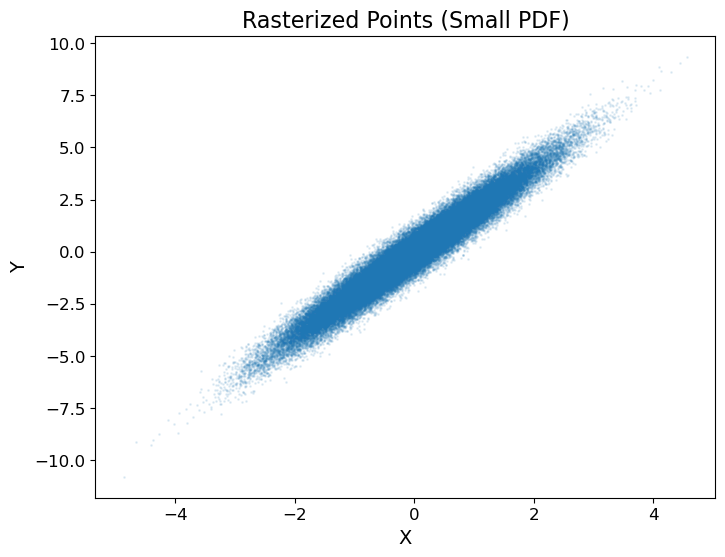

Vector-only PDF: 1,550,493 bytes (1.48 MB)
Rasterized PDF: 138,076 bytes (0.13 MB)
Size reduction: 91.1%


In [70]:
import os

# Generate many points to see real difference in file sizes
n = 100000  # Increase this for more dramatic differences
x = np.random.normal(0, 1, n)
y = 2*x + np.random.normal(0, 0.5, n)

# First figure: all vector (large file)
fig1 = plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=1, alpha=0.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('All Vector (Large PDF)')
plt.savefig('all_vector.pdf', format='pdf')
plt.show()

# Second figure: rasterized scatter (small file)
fig2 = plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=1, alpha=0.1, rasterized=True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Rasterized Points (Small PDF)')
plt.savefig('rasterized_points.pdf', format='pdf', dpi=300)
plt.show()

# Check file sizes
vector_size = os.path.getsize('all_vector.pdf')
raster_size = os.path.getsize('rasterized_points.pdf')

print(f"Vector-only PDF: {vector_size:,} bytes ({vector_size/1024/1024:.2f} MB)")
print(f"Rasterized PDF: {raster_size:,} bytes ({raster_size/1024/1024:.2f} MB)")

if vector_size > raster_size:
    print(f"Size reduction: {(vector_size - raster_size)/vector_size*100:.1f}%")
else:
    print("Note: Try increasing n to 500000+ for more dramatic file size differences!")

## Interactive Plots with ipywidgets

Static plots are essential for papers, but interactive plots help explore data. Let's use ipywidgets to add controls to our plots:

In [71]:
import ipywidgets as widgets
from IPython.display import display

### Simple Interactive Sine Wave

Let's create a sine wave where we can adjust the frequency:

In [ ]:
@widgets.interact(frequency=(0.1, 5.0, 0.1))  
def plot_wave(frequency=1.0):
    plt.figure(figsize=(8, 4))
    t = np.linspace(0, 10, 1000)
    plt.plot(t, np.sin(2*np.pi*frequency*t))
    plt.ylim(-1.5, 1.5)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f'Frequency = {frequency:.1f} Hz')
    plt.grid(True, alpha=0.3)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='frequency', max=5.0, min=0.1), Output()), _dom_class…

The `@widgets.interact` decorator automatically creates a slider that controls the frequency parameter!
The argument `frequency=(0.1, 5.0, 0.1)` defines the slider properties:
- 0.1: minimum value
- 5.0: maximum value  
- 0.1: step size (how much the slider increments)
This creates a continuous slider from 0.1 to 5.0 Hz with 0.1 Hz increments.

### Interactive Color-Magnitude Diagram

For more sophisticated controls, let's build an interactive CMD explorer:

In [73]:
def plot_cmd(magnitude_limit, color_range):
    # Generate stellar data
    n_stars = 500
    color = np.random.normal(0.8, 0.3, n_stars)
    magnitude = 14 + 3*color + np.random.normal(0, 0.5, n_stars)
    
    # Apply filters
    mask = (magnitude < magnitude_limit) & (color > color_range[0]) & (color < color_range[1])
    
    # Plot - always label your axes!
    plt.figure(figsize=(8, 6))
    plt.scatter(color[mask], magnitude[mask], s=5, alpha=0.5)
    plt.xlabel('B-V Color')
    plt.ylabel('V Magnitude')
    plt.title(f'CMD: {mask.sum()} stars shown')
    plt.gca().invert_yaxis()
    plt.xlim(-0.5, 2)
    plt.ylim(20, 10)
    plt.grid(True, alpha=0.3)
    plt.show()

We'll use widgets to build sliders that control our CMD plot parameters. The `FloatSlider` creates a single-value slider for magnitude limit, where the `value` parameter sets the initial position at 18, `min` and `max` define the range from 12 to 20, and `description` provides the label text that appears next to the slider. The `FloatRangeSlider` creates a double-ended slider for color range selection, with `value=[0, 1.5]` setting the initial range selection, `min=-0.5` and `max=2` defining the full slider extent, and `description` again providing the label. These widgets will automatically update the plot whenever the user moves the sliders, creating an interactive exploration tool for the color-magnitude diagram.

In [74]:
# Create widgets
mag_slider = widgets.FloatSlider(value=18, min=12, max=20, description='Mag Limit:')
color_slider = widgets.FloatRangeSlider(value=[0, 1.5], min=-0.5, max=2, description='Color Range:')

# Make it interactive
interactive = widgets.interactive(plot_cmd, 
                                 magnitude_limit=mag_slider,
                                 color_range=color_slider)
display(interactive)

interactive(children=(FloatSlider(value=18.0, description='Mag Limit:', max=20.0, min=12.0), FloatRangeSlider(…

Now you can explore how different cuts affect your color-magnitude diagram in real-time!

## Customization for Publication-Quality Figures

### Setting Appropriate Font Sizes

Small fonts that look fine on your screen become illegible in publications. Always check your font sizes:

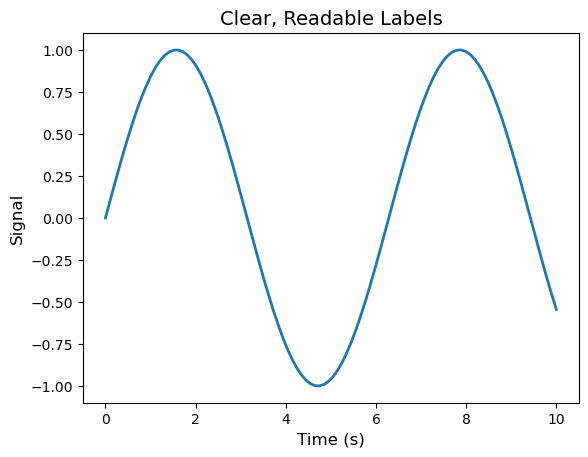

In [75]:
fig, ax = plt.subplots()

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x))

# Always label your axes with appropriate font sizes!
ax.set_xlabel('Time (s)', fontsize=12)  
ax.set_ylabel('Signal', fontsize=12)
ax.set_title('Clear, Readable Labels', fontsize=14)
ax.tick_params(labelsize=10)
plt.show()

A good rule: when your figure is printed at its final size, the smallest text should be at least 8 points.

### Saving Figures in the Right Format

Different formats serve different purposes:

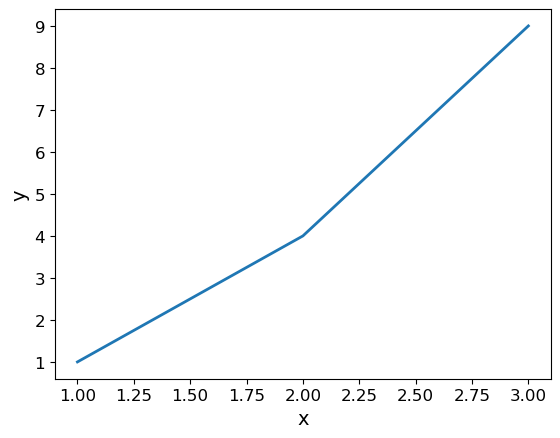

In [76]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3], [1, 4, 9])
ax.set_xlabel('x')  # Never forget axis labels!
ax.set_ylabel('y')

# For journal papers - use vector format
plt.savefig('figure.pdf')

# For presentations or web - use raster format
plt.savefig('figure.png', dpi=300)  # dpi = dots per inch

plt.show()  # Display after saving

Vector formats (PDF, EPS) remain sharp at any zoom level - perfect for line plots. Raster formats (PNG, JPG) are better for complex images. Use `dpi=300` for publication quality. Also always rasterize your plot when you have many data points in a scatter plot.

To remove extra whitespace:

In [77]:
plt.savefig('figure.pdf', bbox_inches='tight')

### Using Colorblind-Friendly Colors

About 8% of men and 0.5% of women have color vision deficiency. Use colors that everyone can distinguish:

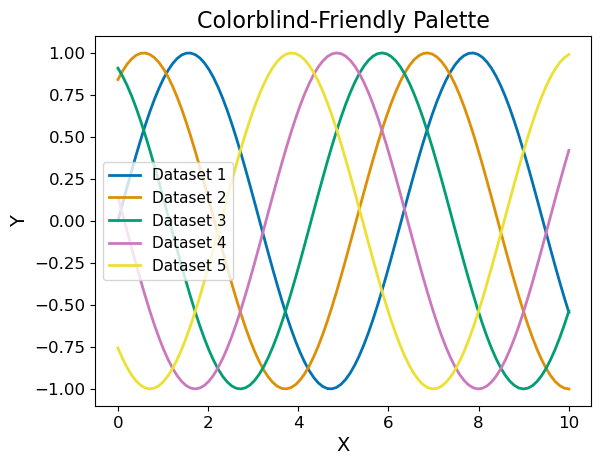

In [78]:
# Define a colorblind-friendly palette
colors = ['#0173B2',  # Blue
          '#DE8F05',  # Orange
          '#029E73',  # Green
          '#CC78BC',  # Light purple
          '#ECE133']  # Yellow

x = np.linspace(0, 10, 100)
for i, color in enumerate(colors):
    plt.plot(x, np.sin(x + i), color=color, label=f'Dataset {i+1}')

plt.legend()
plt.xlabel('X')  # Always label axes!
plt.ylabel('Y')
plt.title('Colorblind-Friendly Palette')
plt.show()

Avoid red-green combinations. Blue and orange are generally safe choices.

### A Complete Publication-Ready Example

Let's combine everything we've learned to create a figure ready for journal submission:

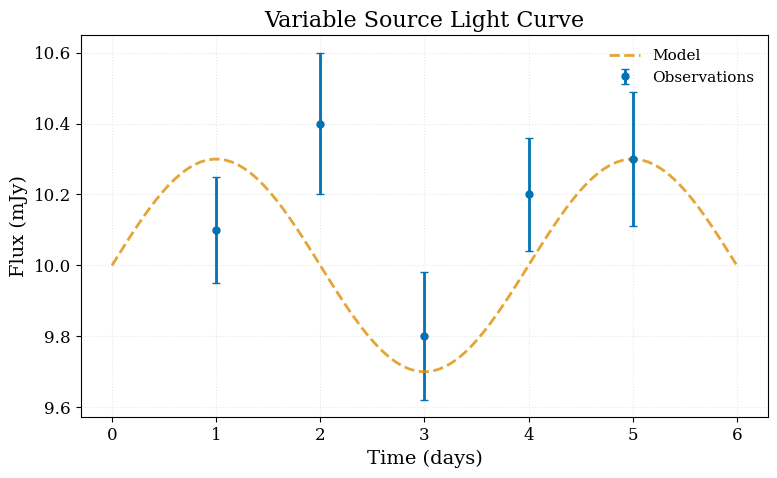

In [79]:
# Set up rcParams for publication
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

# Create figure
fig, ax = plt.subplots(figsize=(8, 5))

# Create data with uncertainties
time = np.array([1, 2, 3, 4, 5])
flux = np.array([10.1, 10.4, 9.8, 10.2, 10.3])
error = np.array([0.15, 0.2, 0.18, 0.16, 0.19])

# Plot data with error bars
ax.errorbar(time, flux, yerr=error,
            fmt='o',         # Circles
            color='#0173B2',  # Professional blue
            capsize=3,       # Error bar cap width
            markersize=5,
            label='Observations')

# Add a model for comparison
time_model = np.linspace(0, 6, 100)
flux_model = 10 + 0.3*np.sin(2*np.pi*time_model/4)
ax.plot(time_model, flux_model, '--', 
        color='#DE8F05',  # Professional orange
        alpha=0.8, 
        linewidth=2,
        label='Model')

# Add clear labels with units - ESSENTIAL!
ax.set_xlabel('Time (days)')
ax.set_ylabel('Flux (mJy)')
ax.set_title(r'Variable Source Light Curve')

# Add legend and grid
ax.legend(loc='upper right', frameon=False)
ax.grid(True, alpha=0.3, linestyle=':')

# Adjust layout and save
plt.tight_layout()
plt.savefig('publication_figure.pdf', dpi=300, bbox_inches='tight')
plt.show()

This example includes all the elements of a professional figure: clear labels with units, error bars, model comparison, appropriate fonts, clean styling, and proper saving.

## Summary

You've now mastered the fundamental and advanced tools for creating astronomical visualizations:

### Basic plotting provides:
- **Line plots** - Connect data points to show trends and time series
- **Scatter plots** - Display individual measurements and correlations
- **Histograms** - Reveal distributions and population statistics
- **Error bars** - Show measurement uncertainties honestly
- **Logarithmic scales** - Handle data spanning orders of magnitude

### 2D visualization enables:
- **Image display** - Show CCD data and spatial information
- **Density plots** - Handle millions of points without overcrowding
- **Hexagonal binning** - Natural representation of dense data
- **Contour maps** - Display confidence regions and parameter constraints
- **Colorbars** - Communicate value-to-color mappings clearly
- **Proper scaling** - Reveal both bright and faint features

### 3D visualization offers:
- **Surface plots** - Visualize 2D functions and fitted surfaces
- **3D scatter** - Show three-dimensional distributions
- **Custom viewing angles** - Optimize perspective for clarity

### The object-oriented interface offers:
- **Multiple subplots** - Compare datasets side by side
- **Shared axes** - Link plots for synchronized zooming
- **Twin axes** - Show different units on the same plot

### Advanced customization provides:
- **rcParams** - Set global defaults for consistent styling
- **LaTeX rendering** - Professional mathematical notation
- **DPI control** - Optimize resolution for different media
- **Rasterization** - Manage file sizes for complex figures

### Interactive and specialized features:
- **Inset plots** - Zoom in on interesting regions
- **Sky projections** - Display all-sky survey data properly
- **Interactive widgets** - Explore parameter spaces dynamically

Whether you're plotting a simple light curve or creating a complex multi-wavelength figure with 3D surfaces and LaTeX equations, these tools help you communicate your science effectively. Start with basic plots to explore your data, then systematically improve them for publication using rcParams, appropriate DPI settings, and selective rasterization for optimal file sizes.

Remember: **Always label your axes!** Every element of your figure should help tell your scientific story. Remove what doesn't contribute, emphasize what matters, and always consider your audience. Good figures can convey complex results more effectively than pages of text.
